<a href="https://colab.research.google.com/github/gretchenvargas/gretchenvargas/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción y Objetivos

**CallMeMaybe** está desarrollando una nueva función para que supervisores identifiquen a los operadores menos eficaces. Se considerará *ineficaz* a quien registre muchas llamadas entrantes perdidas, altos tiempos de espera y, cuando corresponda, pocas llamadas salientes realizadas.

# Carga y Exploración de Datos

## Importación de librerías

In [ ]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Configuración de pandas para mostrar más columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Carga de datasets

In [ ]:
# Cargar los datasets
df = pd.read_csv('/datasets/telecom_dataset_us.csv')  # Dataset de llamadas
clients = pd.read_csv('/datasets/telecom_clients_us.csv')  # Dataset de clientes

## Exploración inicial de datos

## Data Frame

In [ ]:
print(f"Forma del dataset: {df.shape}")

Forma del dataset: (53902, 9)


In [ ]:
print(f"Columnas: {list(df.columns)}")

Columnas: ['user_id', 'date', 'direction', 'internal', 'operator_id', 'is_missed_call', 'calls_count', 'call_duration', 'total_call_duration']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [ ]:
df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


## Clientes

In [ ]:
print(f"Forma del dataset: {clients.shape}")

Forma del dataset: (732, 3)


In [ ]:
print(f"Columnas: {list(clients.columns)}")

Columnas: ['user_id', 'tariff_plan', 'date_start']


In [ ]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [ ]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


# Limpieza y Preparación

#### Duplicados y Datos Ausentes

In [ ]:
print("ANÁLISIS DE DUPLICADOS")
print(f"Duplicados en df: {df.duplicated().sum()}")
print(f"Duplicados en clients: {clients.duplicated().sum()}")

ANÁLISIS DE DUPLICADOS
Duplicados en df: 4900
Duplicados en clients: 0


In [ ]:
print("\nANÁLISIS DE DATOS AUSENTES")
print("Datos ausentes en df:")
print(df.isnull().sum())
print("\nDatos ausentes en clients:")
print(clients.isnull().sum())


ANÁLISIS DE DATOS AUSENTES
Datos ausentes en df:
user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

Datos ausentes en clients:
user_id        0
tariff_plan    0
date_start     0
dtype: int64


In [ ]:
# Eliminar duplicados en df
df_clean = df.drop_duplicates()
print(f"Filas duplicadas eliminadas en df: {len(df) - len(df_clean)}")

Filas duplicadas eliminadas en df: 4900


In [ ]:
# Eliminar duplicados en clients
clients_clean = clients.drop_duplicates()
print(f"Filas duplicadas eliminadas en clients: {len(clients) - len(clients_clean)}")

Filas duplicadas eliminadas en clients: 0


#### Cambio de objeto a datetime

In [ ]:
# Convertir fechas en el dataset de df
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    print("✅ Fechas de df convertidas")

# Convertir fechas en el dataset de clientes
if 'date_start' in clients.columns:
    clients['date_start'] = pd.to_datetime(clients['date_start'])
    print("✅ Fechas de clients convertidas")

print("\n🎉 Todas las fechas convertidas exitosamente")

✅ Fechas de df convertidas
✅ Fechas de clients convertidas

🎉 Todas las fechas convertidas exitosamente


## Verificación de calidad de datos

In [ ]:
# Analizar el impacto de los datos ausentes
print("Porcentaje de datos ausentes:")
print((df_clean.isnull().sum() / len(df_clean)) * 100)

Porcentaje de datos ausentes:
user_id                 0.000000
date                    0.000000
direction               0.000000
internal                0.224481
operator_id            15.215705
is_missed_call          0.000000
calls_count             0.000000
call_duration           0.000000
total_call_duration     0.000000
dtype: float64


In [ ]:
# Verificar tipos actuales
df_clean.dtypes

user_id                  int64
date                    object
direction               object
internal                object
operator_id            float64
is_missed_call            bool
calls_count              int64
call_duration            int64
total_call_duration      int64
dtype: object

In [ ]:
print("ESTADÍSTICAS DESCRIPTIVAS:")
print(df_clean.describe())

ESTADÍSTICAS DESCRIPTIVAS:
             user_id    operator_id   calls_count  call_duration  \
count   49002.000000   41546.000000  49002.000000   49002.000000   
mean   167294.892759  916523.315409     16.462777     866.282091   
std       598.558965   21230.041008     63.604098    3775.503352   
min    166377.000000  879896.000000      1.000000       0.000000   
25%    166782.000000  900790.500000      1.000000       0.000000   
50%    167158.000000  913938.000000      4.000000      37.000000   
75%    167819.000000  937708.000000     12.000000     570.000000   
max    168606.000000  973286.000000   4817.000000  144395.000000   

       total_call_duration  
count         49002.000000  
mean           1156.558202  
std            4451.473661  
min               0.000000  
25%              46.000000  
50%             208.000000  
75%             901.000000  
max          166155.000000  


In [ ]:
print("ANÁLISIS DE RANGOS LÓGICOS")

# Duración de llamadas
print("CALL_DURATION:")
print(f"   Mínimo: {df_clean['call_duration'].min()} segundos")
print(f"   Máximo: {df_clean['call_duration'].max()} segundos")
print(f"   ¿Hay duraciones negativas?: {(df_clean['call_duration'] < 0).sum()}")

ANÁLISIS DE RANGOS LÓGICOS
CALL_DURATION:
   Mínimo: 0 segundos
   Máximo: 144395 segundos
   ¿Hay duraciones negativas?: 0


In [ ]:
# Número de llamadas
print("CALLS_COUNT:")
print(f"   Mínimo: {df_clean['calls_count'].min()}")
print(f"   Máximo: {df_clean['calls_count'].max()}")
print(f"   ¿Hay conteos negativos?: {(df_clean['calls_count'] < 0).sum()}")

CALLS_COUNT:
   Mínimo: 1
   Máximo: 4817
   ¿Hay conteos negativos?: 0


In [ ]:
# Total de duración
print("TOTAL_CALL_DURATION:")
print(f"   Mínimo: {df_clean['total_call_duration'].min()} segundos")
print(f"   Máximo: {df_clean['total_call_duration'].max()} segundos")

TOTAL_CALL_DURATION:
   Mínimo: 0 segundos
   Máximo: 166155 segundos


In [ ]:
def detectar_outliers(columna, nombre):
    Q1 = df_clean[columna].quantile(0.25)
    Q3 = df_clean[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[columna] < limite_inferior) |
                       (df_clean[columna] > limite_superior)]

    print(f"\nOUTLIERS EN {nombre.upper()}")
    print(f"Límite inferior: {limite_inferior:.2f}")
    print(f"Límite superior: {limite_superior:.2f}")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Porcentaje de outliers: {(len(outliers)/len(df_clean))*100:.2f}%")

    return outliers

# Analizar outliers en cada variable numérica
outliers_duration = detectar_outliers('call_duration', 'duración de llamada')
outliers_count = detectar_outliers('calls_count', 'número de llamadas')
outliers_total = detectar_outliers('total_call_duration', 'duración total')


OUTLIERS EN DURACIÓN DE LLAMADA
Límite inferior: -855.00
Límite superior: 1425.00
Número de outliers: 6866
Porcentaje de outliers: 14.01%

OUTLIERS EN NÚMERO DE LLAMADAS
Límite inferior: -15.50
Límite superior: 28.50
Número de outliers: 6047
Porcentaje de outliers: 12.34%

OUTLIERS EN DURACIÓN TOTAL
Límite inferior: -1236.50
Límite superior: 2183.50
Número de outliers: 5932
Porcentaje de outliers: 12.11%


### Conclusiones:
**Dataset principal:** 49,002 registros (después de limpiar duplicados)<br>
**Dataset de clientes:** 732 registros<br>
**Datos Ausentes:** 15.2% en operator_id

# Análisis de Eficiencia por Métrica
## Análisis de Llamadas Perdidas


In [ ]:
# Analizar llamadas perdidas por operador
llamadas_perdidas = df_clean.groupby('operator_id').agg({
    'is_missed_call': ['count', 'sum'],
    'calls_count': 'sum'
}).round(2)

llamadas_perdidas.columns = ['total_llamadas', 'llamadas_perdidas', 'total_calls_count']
llamadas_perdidas['porcentaje_perdidas'] = (llamadas_perdidas['llamadas_perdidas'] /
                                           llamadas_perdidas['total_llamadas'] * 100).round(2)

# Mostrar los resultados del análisis de llamadas perdidas
print("=== ANÁLISIS DE LLAMADAS PERDIDAS POR OPERADOR ===")
print(llamadas_perdidas.head(5))

=== ANÁLISIS DE LLAMADAS PERDIDAS POR OPERADOR ===
             total_llamadas  llamadas_perdidas  total_calls_count  \
operator_id                                                         
879896.0                117                 47                930   
879898.0                227                 89               7313   
880020.0                 20                  6                 45   
880022.0                 70                 29                197   
880026.0                182                 87               2232   

             porcentaje_perdidas  
operator_id                       
879896.0                   40.17  
879898.0                   39.21  
880020.0                   30.00  
880022.0                   41.43  
880026.0                   47.80  


In [ ]:
# Identificar operadores con mayor porcentaje de llamadas perdidas
print("\n=== TOP 10 OPERADORES CON MÁS LLAMADAS PERDIDAS ===")
top_perdidas = llamadas_perdidas.sort_values('porcentaje_perdidas', ascending=False).head(10)
print(top_perdidas)


=== TOP 10 OPERADORES CON MÁS LLAMADAS PERDIDAS ===
             total_llamadas  llamadas_perdidas  total_calls_count  \
operator_id                                                         
899076.0                  2                  2                  2   
960674.0                  1                  1                  2   
914272.0                  1                  1                  1   
885682.0                  3                  3                  3   
914626.0                  1                  1                  1   
891976.0                  1                  1                  2   
969262.0                  1                  1                  1   
919418.0                  1                  1                  2   
937872.0                  1                  1                  1   
969284.0                  1                  1                  1   

             porcentaje_perdidas  
operator_id                       
899076.0                   100.0  
960674.0     

In [ ]:
# Estadísticas generales
print(f"ESTADÍSTICAS GENERALES:")
print(f"Promedio de llamadas perdidas: {llamadas_perdidas['porcentaje_perdidas'].mean():.2f}%")
print(f"Operador con más llamadas perdidas: {llamadas_perdidas['porcentaje_perdidas'].max():.2f}%")
print(f"Operador con menos llamadas perdidas: {llamadas_perdidas['porcentaje_perdidas'].min():.2f}%")

ESTADÍSTICAS GENERALES:
Promedio de llamadas perdidas: 31.55%
Operador con más llamadas perdidas: 100.00%
Operador con menos llamadas perdidas: 0.00%


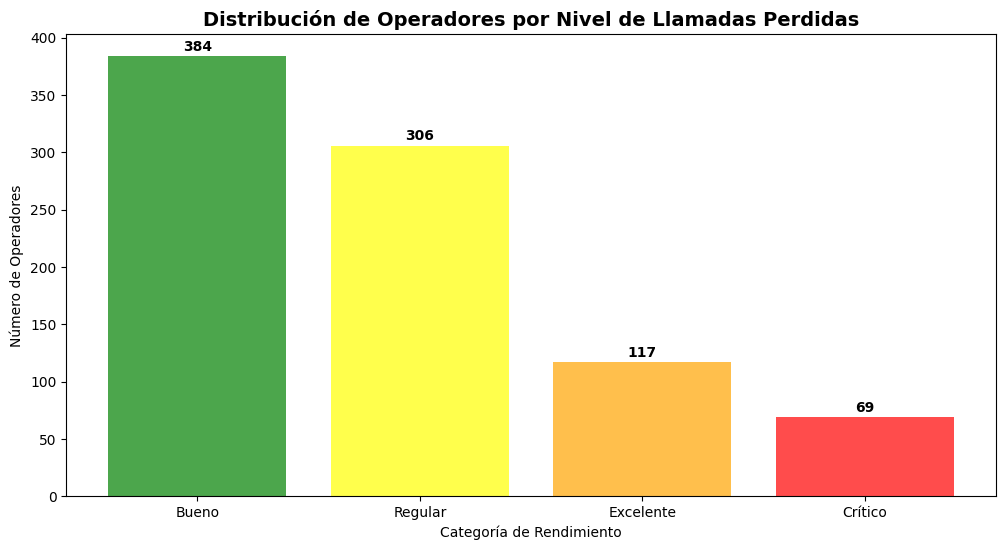

In [ ]:
# Gráfico de llamadas perdidas para supervisores
plt.figure(figsize=(12, 6))

# Crear categorías de rendimiento
llamadas_perdidas['categoria'] = pd.cut(llamadas_perdidas['porcentaje_perdidas'], bins=[0, 20, 40, 60, 100], labels=['Excelente', 'Bueno', 'Regular', 'Crítico'])

# Gráfico de barras por categoría
categoria_counts = llamadas_perdidas['categoria'].value_counts()
colors = ['green', 'yellow', 'orange', 'red']
plt.bar(categoria_counts.index, categoria_counts.values, color=colors, alpha=0.7)
plt.title('Distribución de Operadores por Nivel de Llamadas Perdidas', fontsize=14, fontweight='bold')
plt.ylabel('Número de Operadores')
plt.xlabel('Categoría de Rendimiento')

# Agregar valores en las barras
for i, v in enumerate(categoria_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.show()

### Conclusiones:

La mayoría de los operadores presentan un desempeño aceptable, el **79%** se concentra en categorías Bueno y Regular. <br>
Sin embargo, el nivel Crítico agrupa a **69 operadores**, quienes representan un riesgo operativo y requieren intervención prioritaria.

## Análisis de Tiempo de Espera  

In [ ]:
# Analizar duración de llamadas por operador
tiempo_espera = df_clean.groupby('operator_id').agg({
    'call_duration': ['count', 'mean', 'median', 'std', 'sum'],
    'is_missed_call': 'sum'
}).round(2)

# Simplificar nombres de columnas
tiempo_espera.columns = ['total_llamadas', 'duracion_promedio', 'duracion_mediana',
                        'desviacion_std', 'tiempo_total', 'llamadas_perdidas']

# Calcular métricas adicionales
tiempo_espera['duracion_promedio_minutos'] = (tiempo_espera['duracion_promedio'] / 60).round(2)
tiempo_espera['tiempo_total_horas'] = (tiempo_espera['tiempo_total'] / 3600).round(2)

print("ANÁLISIS DE TIEMPO DE ESPERA POR OPERADOR:")
print(tiempo_espera.head())

ANÁLISIS DE TIEMPO DE ESPERA POR OPERADOR:
             total_llamadas  duracion_promedio  duracion_mediana  \
operator_id                                                        
879896.0                117             545.83              26.0   
879898.0                227            1133.88              66.0   
880020.0                 20             112.25              36.0   
880022.0                 70             216.39              51.0   
880026.0                182             842.45              26.0   

             desviacion_std  tiempo_total  llamadas_perdidas  \
operator_id                                                    
879896.0            1401.78         63862                 47   
879898.0            1886.76        257391                 89   
880020.0             229.01          2245                  6   
880022.0             399.90         15147                 29   
880026.0            1077.15        153326                 87   

             duracion_promedio_

In [ ]:
# Agregar después de tu código existente
print("DISTRIBUCIÓN DE TIEMPOS DE ESPERA:")
print(f"Duración promedio general: {tiempo_espera['duracion_promedio_minutos'].mean():.2f} minutos")
print(f"Mediana: {tiempo_espera['duracion_promedio_minutos'].median():.2f} minutos")
print(f"Desviación estándar: {tiempo_espera['duracion_promedio_minutos'].std():.2f} minutos")

DISTRIBUCIÓN DE TIEMPOS DE ESPERA:
Duración promedio general: 10.79 minutos
Mediana: 4.05 minutos
Desviación estándar: 19.98 minutos


In [ ]:
# Percentiles
percentiles = [25, 50, 75, 90, 95]
print("Percentiles de duración promedio:")
for p in percentiles:
    valor = tiempo_espera['duracion_promedio_minutos'].quantile(p/100)
    print(f"  {p}%: {valor:.2f} minutos")

Percentiles de duración promedio:
  25%: 1.29 minutos
  50%: 4.05 minutos
  75%: 11.10 minutos
  90%: 27.24 minutos
  95%: 47.15 minutos


In [ ]:
# Categorizar operadores por eficiencia de tiempo
def categorizar_tiempo(duracion):
    if duracion <= 5:
        return "Excelente"
    elif duracion <= 15:
        return "Bueno"
    elif duracion <= 30:
        return "Regular"
    else:
        return "Problemático"

tiempo_espera['categoria_tiempo'] = tiempo_espera['duracion_promedio_minutos'].apply(categorizar_tiempo)
print("DISTRIBUCIÓN POR CATEGORÍAS:")
print(tiempo_espera['categoria_tiempo'].value_counts())

DISTRIBUCIÓN POR CATEGORÍAS:
Excelente       603
Bueno           285
Regular         104
Problemático    100
Name: categoria_tiempo, dtype: int64


### Conclusiones:

Los tiempos de atención presentan alta variabilidad:<br>
- Aunque la mitad de las llamadas termina antes de **4.05 minutos**, un *5% supera los 47.15* y eleva el promedio a *10.79 minutos*.<br>
- El 55% del desempeño se clasifica como “Excelente”, mientras que 100 casos son críticos.<br>

## Análisis de Llamadas Salientes

In [ ]:
print("EXPLORACIÓN DE LLAMADAS SALIENTES:")

# Filtrar solo llamadas salientes
llamadas_salientes = df_clean[df_clean['direction'] == 'out'].copy()

print(f"Total de registros de llamadas salientes: {len(llamadas_salientes)}")
print(f"Porcentaje del dataset: {(len(llamadas_salientes)/len(df_clean))*100:.2f}%")

EXPLORACIÓN DE LLAMADAS SALIENTES:
Total de registros de llamadas salientes: 28999
Porcentaje del dataset: 59.18%


In [ ]:
# Verificar si hay operadores asignados a llamadas salientes
print(f"Llamadas salientes con operador asignado: {llamadas_salientes['operator_id'].notna().sum()}")
print(f"Llamadas salientes sin operador: {llamadas_salientes['operator_id'].isna().sum()}")

Llamadas salientes con operador asignado: 28813
Llamadas salientes sin operador: 186


In [ ]:
print("MÉTRICAS DE LLAMADAS SALIENTES POR OPERADOR")

# Calcular métricas por operador
salientes_por_operador = llamadas_salientes.groupby('operator_id').agg({
    'user_id': 'count',  # ✅ Para contar registros
    'call_duration': ['mean', 'sum']  # ✅ Para duración
})

# Aplanar nombres de columnas
salientes_por_operador.columns = ['total_salientes', 'duracion_promedio_salientes', 'duracion_total_salientes']
salientes_por_operador = salientes_por_operador.reset_index()

# Convertir duración a minutos
salientes_por_operador['duracion_promedio_minutos'] = (salientes_por_operador['duracion_promedio_salientes'] / 60).round(2)
salientes_por_operador['duracion_total_horas'] = (salientes_por_operador['duracion_total_salientes'] / 3600).round(2)

print(f"Operadores que realizan llamadas salientes: {len(salientes_por_operador)}")
print(f"Promedio de llamadas salientes por operador: {salientes_por_operador['total_salientes'].mean():.2f}")
print(f"Mediana: {salientes_por_operador['total_salientes'].median():.2f}")

MÉTRICAS DE LLAMADAS SALIENTES POR OPERADOR
Operadores que realizan llamadas salientes: 882
Promedio de llamadas salientes por operador: 32.67
Mediana: 19.00


### Conclusiones:
Las llamadas salientes representan el **59.18%** del total y están casi totalmente cubiertas por operadores (99.3%). Con 882 operadores activos, la carga está distribuida de forma desigual, pues aunque el promedio es 32.67 llamadas por operador, la *mediana de 19 indica mayor concentración en pocos agentes*.

## Identificación de Operadores Ineficaces

In [ ]:
# Identificar operadores con tiempos prolongados
print("OPERADORES CON TIEMPOS PROLONGADOS:")

# Calcular umbrales (percentil 75 como referencia)
umbral_duracion = tiempo_espera['duracion_promedio_minutos'].quantile(0.75)
umbral_tiempo_total = tiempo_espera['tiempo_total_horas'].quantile(0.75)

print(f"Umbral duración promedio: {umbral_duracion:.2f} minutos")
print(f"Umbral tiempo total: {umbral_tiempo_total:.2f} horas")

OPERADORES CON TIEMPOS PROLONGADOS:
Umbral duración promedio: 11.10 minutos
Umbral tiempo total: 9.40 horas


In [ ]:
# Filtrar operadores con tiempos prolongados
operadores_tiempo_prolongado = tiempo_espera[
    (tiempo_espera['duracion_promedio_minutos'] > umbral_duracion) |
    (tiempo_espera['tiempo_total_horas'] > umbral_tiempo_total)
].sort_values('duracion_promedio_minutos', ascending=False)

print(f"TOP 10 OPERADORES CON MAYOR DURACIÓN PROMEDIO")
print(operadores_tiempo_prolongado[['duracion_promedio_minutos', 'tiempo_total_horas',
                                   'total_llamadas', 'llamadas_perdidas']].head(10))

TOP 10 OPERADORES CON MAYOR DURACIÓN PROMEDIO
             duracion_promedio_minutos  tiempo_total_horas  total_llamadas  \
operator_id                                                                  
885876.0                        257.01             1212.21             283   
885890.0                        220.08              928.00             253   
925922.0                        189.22              230.22              73   
945310.0                        119.58               89.69              45   
945294.0                        112.80               75.20              40   
919302.0                        111.78               61.48              33   
945304.0                        103.31               65.43              38   
965544.0                        100.90               21.86              13   
908640.0                        100.31               71.89              43   
952734.0                         98.48               31.18              19   

             llam

In [ ]:
# Combinar ambos análisis
analisis_combinado = tiempo_espera.merge(
    llamadas_perdidas[['porcentaje_perdidas']],
    left_index=True,
    right_index=True
)

# Filtrar operadores problemáticos (criterios múltiples)
operadores_problematicos = analisis_combinado[
    (analisis_combinado['duracion_promedio_minutos'] > umbral_duracion) &
    (analisis_combinado['porcentaje_perdidas'] > 30)  # Más del 30% perdidas
].sort_values(['duracion_promedio_minutos', 'porcentaje_perdidas'], ascending=False)

print("OPERADORES CON DOBLE PROBLEMA (TIEMPO + PERDIDAS):")
print(operadores_problematicos[['duracion_promedio_minutos', 'tiempo_total_horas',
                               'porcentaje_perdidas', 'total_llamadas']].head(10))

OPERADORES CON DOBLE PROBLEMA (TIEMPO + PERDIDAS):
             duracion_promedio_minutos  tiempo_total_horas  \
operator_id                                                  
885876.0                        257.01             1212.21   
885890.0                        220.08              928.00   
925922.0                        189.22              230.22   
945310.0                        119.58               89.69   
945294.0                        112.80               75.20   
919302.0                        111.78               61.48   
945304.0                        103.31               65.43   
965544.0                        100.90               21.86   
908640.0                        100.31               71.89   
945320.0                         92.86               58.81   

             porcentaje_perdidas  total_llamadas  
operator_id                                       
885876.0                   40.64             283  
885890.0                   39.92             253  


In [ ]:
# Crear índice de ineficiencia
print("ÍNDICE DE INEFICIENCIA:")

# Normalizar métricas (0-100 donde 100 es peor)
analisis_combinado['score_tiempo'] = (
    (analisis_combinado['duracion_promedio_minutos'] /
     analisis_combinado['duracion_promedio_minutos'].max()) * 100
).round(2)

analisis_combinado['score_perdidas'] = analisis_combinado['porcentaje_perdidas']

# Índice combinado (promedio ponderado)
analisis_combinado['indice_ineficiencia'] = (
    (analisis_combinado['score_tiempo'] * 0.6) +
    (analisis_combinado['score_perdidas'] * 0.4)
).round(2)

# Top 10 operadores más ineficaces
top_ineficaces = analisis_combinado.sort_values('indice_ineficiencia', ascending=False).head(10)

print("TOP 10 OPERADORES MÁS INEFICACES:")
print(top_ineficaces[['duracion_promedio_minutos', 'porcentaje_perdidas',
                     'indice_ineficiencia', 'total_llamadas']])

ÍNDICE DE INEFICIENCIA:
TOP 10 OPERADORES MÁS INEFICACES:
             duracion_promedio_minutos  porcentaje_perdidas  \
operator_id                                                   
885876.0                        257.01                40.64   
885890.0                        220.08                39.92   
925922.0                        189.22                41.10   
945310.0                        119.58                48.89   
919302.0                        111.78                51.52   
945294.0                        112.80                50.00   
965544.0                        100.90                53.85   
945304.0                        103.31                50.00   
908640.0                        100.31                48.84   
945320.0                         92.86                50.00   

             indice_ineficiencia  total_llamadas  
operator_id                                       
885876.0                   76.26             283  
885890.0                   67.35

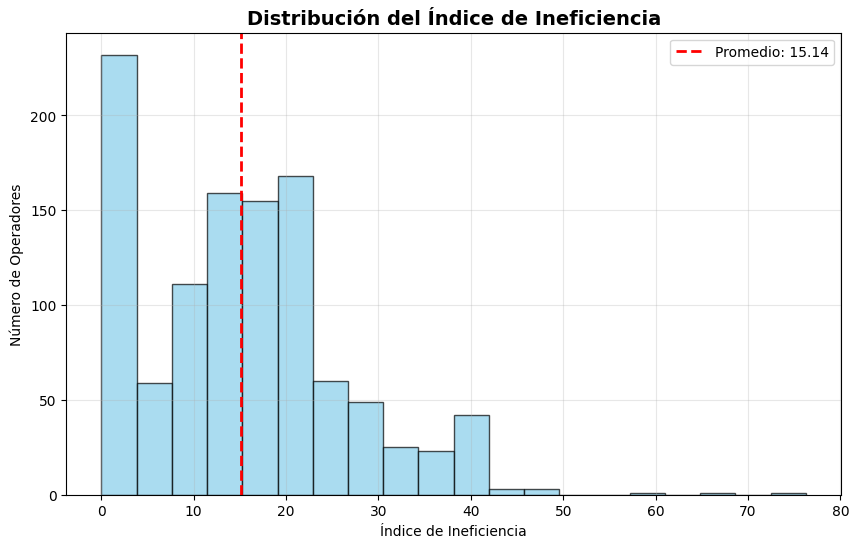

📊 ESTADÍSTICAS DE DISTRIBUCIÓN:
Media: 15.14
Mediana: 15.02
Desviación estándar: 11.08


In [ ]:
# Histograma de distribución del índice de ineficiencia
plt.figure(figsize=(10, 6))
plt.hist(analisis_combinado['indice_ineficiencia'], bins=20, color='skyblue',
         edgecolor='black', alpha=0.7)
plt.axvline(analisis_combinado['indice_ineficiencia'].mean(),
           color='red', linestyle='--', linewidth=2,
           label=f'Promedio: {analisis_combinado["indice_ineficiencia"].mean():.2f}')
plt.title('Distribución del Índice de Ineficiencia', fontsize=14, fontweight='bold')
plt.xlabel('Índice de Ineficiencia')
plt.ylabel('Número de Operadores')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Estadísticas descriptivas
print("📊 ESTADÍSTICAS DE DISTRIBUCIÓN:")
print(f"Media: {analisis_combinado['indice_ineficiencia'].mean():.2f}")
print(f"Mediana: {analisis_combinado['indice_ineficiencia'].median():.2f}")
print(f"Desviación estándar: {analisis_combinado['indice_ineficiencia'].std():.2f}")

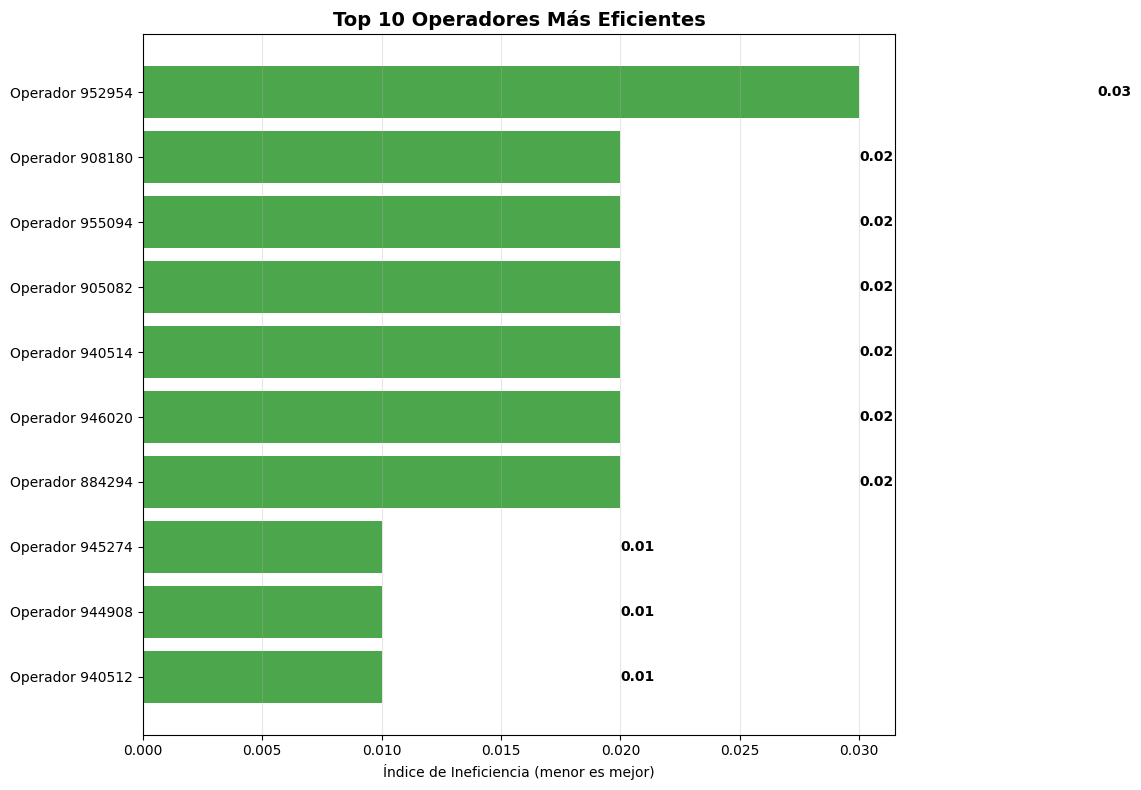

ESTADÍSTICAS DE LOS MEJORES OPERADORES:
Promedio del índice: 0.02
Rango: 0.01 - 0.03


In [ ]:
# Top 10 Operadores Más Eficientes
plt.figure(figsize=(12, 8))
mejores = analisis_combinado.sort_values('indice_ineficiencia').head(10)
bars = plt.barh(range(len(mejores)), mejores['indice_ineficiencia'],
                color='green', alpha=0.7)
plt.yticks(range(len(mejores)), [f'Operador {int(x)}' for x in mejores.index])
plt.title('Top 10 Operadores Más Eficientes', fontsize=14, fontweight='bold')
plt.xlabel('Índice de Ineficiencia (menor es mejor)')

# Agregar valores en las barras
for i, v in enumerate(mejores['indice_ineficiencia']):
    plt.text(v + 0.01, i, f'{v:.2f}', va='center', fontweight='bold')

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Estadísticas de los mejores operadores
print("ESTADÍSTICAS DE LOS MEJORES OPERADORES:")
print(f"Promedio del índice: {mejores['indice_ineficiencia'].mean():.2f}")
print(f"Rango: {mejores['indice_ineficiencia'].min():.2f} - {mejores['indice_ineficiencia'].max():.2f}")

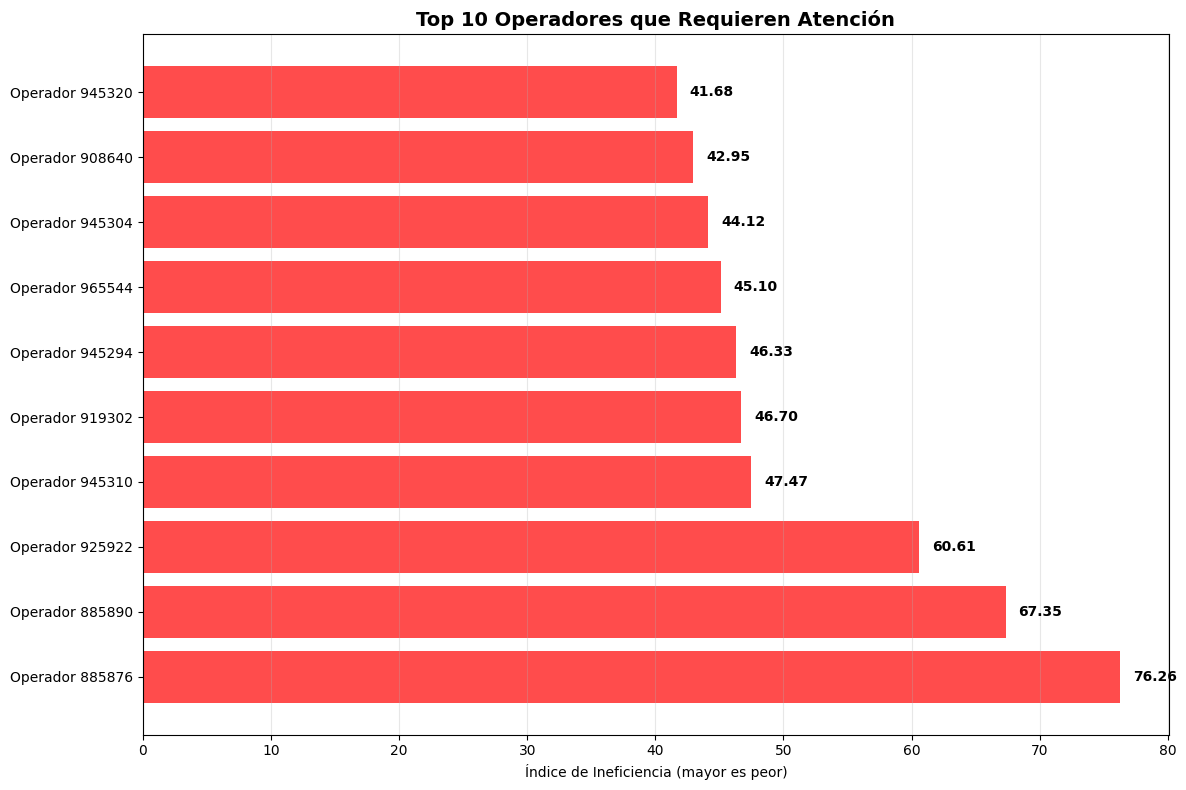

ESTADÍSTICAS DE OPERADORES PROBLEMÁTICOS:
Promedio del índice: 51.86
Rango: 41.68 - 76.26


In [ ]:
# Top 10 Operadores que Requieren Atención
plt.figure(figsize=(12, 8))
peores = analisis_combinado.sort_values('indice_ineficiencia', ascending=False).head(10)
bars = plt.barh(range(len(peores)), peores['indice_ineficiencia'],
                color='red', alpha=0.7)
plt.yticks(range(len(peores)), [f'Operador {int(x)}' for x in peores.index])
plt.title('Top 10 Operadores que Requieren Atención', fontsize=14, fontweight='bold')
plt.xlabel('Índice de Ineficiencia (mayor es peor)')

# Agregar valores en las barras
for i, v in enumerate(peores['indice_ineficiencia']):
    plt.text(v + 1, i, f'{v:.2f}', va='center', fontweight='bold')

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Estadísticas de los operadores problemáticos
print("ESTADÍSTICAS DE OPERADORES PROBLEMÁTICOS:")
print(f"Promedio del índice: {peores['indice_ineficiencia'].mean():.2f}")
print(f"Rango: {peores['indice_ineficiencia'].min():.2f} - {peores['indice_ineficiencia'].max():.2f}")

In [ ]:
# Operadores con bajo rendimiento en salientes
umbral_salientes = salientes_por_operador['total_salientes'].quantile(0.25)
operadores_pocas_salientes = salientes_por_operador[
    salientes_por_operador['total_salientes'] < umbral_salientes
]

# Agregar métricas de salientes al análisis combinado
analisis_final = analisis_combinado.merge(
    salientes_por_operador[['operator_id', 'total_salientes']].set_index('operator_id'),
    left_index=True,
    right_index=True,
    how='left'
)

print(f"Umbral de llamadas salientes: {umbral_salientes}")
print(f"Forma del análisis final: {analisis_final.shape}")
print("\nPrimeras 5 filas:")
print(analisis_final.head())

Umbral de llamadas salientes: 5.0
Forma del análisis final: (1092, 14)

Primeras 5 filas:
             total_llamadas  duracion_promedio  duracion_mediana  \
operator_id                                                        
879896.0                117             545.83              26.0   
879898.0                227            1133.88              66.0   
880020.0                 20             112.25              36.0   
880022.0                 70             216.39              51.0   
880026.0                182             842.45              26.0   

             desviacion_std  tiempo_total  llamadas_perdidas  \
operator_id                                                    
879896.0            1401.78         63862                 47   
879898.0            1886.76        257391                 89   
880020.0             229.01          2245                  6   
880022.0             399.90         15147                 29   
880026.0            1077.15        153326        

### Conclusiones:

Aunque los mejores operadores muestran índices mínimos de ineficiencia, un grupo crítico **promedia 51.86**, destacando un caso extremo con **257 min y 40.64% de abandono**. Se identifican *10 operadores con tiempos excesivos y alto abandono*, requiriendo intervención inmediata y estandarización operativa.

# Prueba de hipótesis estadísticas

### Primera hipótesis
Los operadores con índice de ineficiencia superior a 30 tienen un tiempo promedio de llamada significativamente mayor al estándar de la industria (8 minutos):

H₀ (Hipótesis Nula): μ ≤ 8 minutos
- El tiempo promedio de llamada de operadores críticos es menor o igual a 8 minutos

H₁ (Hipótesis Alternativa): μ > 8 minutos  
- El tiempo promedio de llamada de operadores críticos es mayor a 8 minutos

In [ ]:
# Filtrar operadores críticos
operadores_criticos = analisis_combinado[analisis_combinado['indice_ineficiencia'] > 30]
tiempos_criticos = operadores_criticos['duracion_promedio_minutos']

print(f"Operadores críticos identificados: {len(operadores_criticos)}")
print(f"Tiempo promedio de operadores críticos: {tiempos_criticos.mean():.2f} minutos")

Operadores críticos identificados: 104
Tiempo promedio de operadores críticos: 42.42 minutos


In [ ]:
# Importar scipy para la prueba estadística
from scipy import stats

# Parámetros de la prueba
mu_0 = 8  # Estándar de la industria
alpha = 0.05  # Nivel de significancia

# Calcular el percentil 75 del índice de ineficiencia
umbral_p75 = analisis_combinado['indice_ineficiencia'].quantile(0.75)
print(f"Umbral percentil 75: {umbral_p75:.2f}")

# Filtrar operadores críticos
operadores_criticos = analisis_combinado[analisis_combinado['indice_ineficiencia'] >= umbral_p75]
tiempos_criticos = operadores_criticos['duracion_promedio_minutos']

print(f"Operadores críticos identificados: {len(operadores_criticos)}")
print(f"Tiempo promedio de operadores críticos: {tiempos_criticos.mean():.2f} minutos")
print(f"Desviación estándar: {tiempos_criticos.std():.2f} minutos")

Umbral percentil 75: 20.95
Operadores críticos identificados: 273
Tiempo promedio de operadores críticos: 27.09 minutos
Desviación estándar: 33.37 minutos


**Umbral percentil 75: 20.95**
- Esto significa que el 25% de los operadores con peor rendimiento tienen un índice de ineficiencia superior a 20.95

**Operadores críticos identificados: 273**
- Se han identificado 273 operadores que requieren atención prioritaria

**Tiempo promedio de operadores críticos: 27.09 minutos**
- Este es un dato clave para la hipótesis: ¡27.09 minutos es significativamente mayor que el estándar de 8 minutos de la industria!

**Desviación estándar: 33.37 minutos**
- La alta variabilidad sugiere que hay casos muy extremos dentro de este grupo

In [ ]:
# Realizar prueba t de una muestra
t_statistic, p_value = stats.ttest_1samp(tiempos_criticos, mu_0)

print("RESULTADOS DE LA PRUEBA T:")
print(f"Estadístico t: {t_statistic:.4f}")
print(f"Valor p: {p_value:.6f}")
print(f"Nivel de significancia: {alpha}")
print(f"Tamaño de muestra: {len(tiempos_criticos)}")

RESULTADOS DE LA PRUEBA T:
Estadístico t: 9.4518
Valor p: 0.000000
Nivel de significancia: 0.05
Tamaño de muestra: 273


**¡RECHAZAMOS la hipótesis nula (H₀)!**

Esto significa que hay evidencia estadística sólida para afirmar que:
- Los operadores críticos SÍ tienen tiempos promedio significativamente mayores a 8 minutos
- Esta diferencia NO es casualidad

### Segunda hipótesis

¿El porcentaje promedio de llamadas perdidas en CallMeMaybe supera el umbral crítico del 25%?

H₀ (Hipótesis Nula): μ ≤ 25%
- El porcentaje promedio de llamadas perdidas es menor o igual al 25%
H₁ (Hipótesis Alternativa): μ > 25%
- El porcentaje promedio de llamadas perdidas es mayor al 25%

In [ ]:
# Definir parámetros de la hipótesis
mu_0 = 25  # Valor de referencia (25%)
alpha = 0.05  # Nivel de significancia

# Filtrar operadores críticos (usando tu umbral del percentil 75)
umbral_p75 = np.percentile(llamadas_perdidas['porcentaje_perdidas'], 75)
operadores_criticos_mask = llamadas_perdidas['porcentaje_perdidas'] >= umbral_p75
datos_criticos = llamadas_perdidas[operadores_criticos_mask]['porcentaje_perdidas']

print(f"Umbral P75: {umbral_p75:.2f}%")
print(f"Número de operadores críticos: {len(datos_criticos)}")
print(f"Porcentaje promedio de llamadas perdidas (críticos): {datos_criticos.mean():.2f}%")

Umbral P75: 47.14%
Número de operadores críticos: 273
Porcentaje promedio de llamadas perdidas (críticos): 59.45%


# Realizar prueba t de una muestra (cola derecha)
t_stat, p_value = stats.ttest_1samp(datos_criticos, mu_0, alternative='greater')

print("PRUEBA DE HIPÓTESIS - LLAMADAS PERDIDAS")
print(f"H₀: μ ≤ {mu_0}%")
print(f"H₁: μ > {mu_0}%")
print(f"Nivel de significancia: {alpha}")
print("\nResultados:")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.6f}")
print(f"Grados de libertad: {len(datos_criticos) - 1}")

**¡RECHAZAMOS la hipótesis nula (H₀)!**

Esto significa que hay evidencia estadística sólida para afirmar que:
- Los operadores críticos SÍ superan significativamente el 25%
- Confianza: 95.0%

# Análisis de Correlación

In [ ]:
# Seleccionar variables clave para correlación
variables_analisis = analisis_combinado[['duracion_promedio_minutos',
                                        'porcentaje_perdidas',
                                        'total_llamadas',
                                        'tiempo_total_horas',
                                        'indice_ineficiencia']].copy()

# Calcular matriz de correlación
correlation_matrix = variables_analisis.corr()

print("MATRIZ DE CORRELACIÓN:")
print(correlation_matrix.round(3))

MATRIZ DE CORRELACIÓN:
                           duracion_promedio_minutos  porcentaje_perdidas  \
duracion_promedio_minutos                      1.000                0.189   
porcentaje_perdidas                            0.189                1.000   
total_llamadas                                 0.234                0.081   
tiempo_total_horas                             0.680                0.078   
indice_ineficiencia                            0.578                0.910   

                           total_llamadas  tiempo_total_horas  \
duracion_promedio_minutos           0.234               0.680   
porcentaje_perdidas                 0.081               0.078   
total_llamadas                      1.000               0.407   
tiempo_total_horas                  0.407               1.000   
indice_ineficiencia                 0.166               0.351   

                           indice_ineficiencia  
duracion_promedio_minutos                0.578  
porcentaje_perdidas      

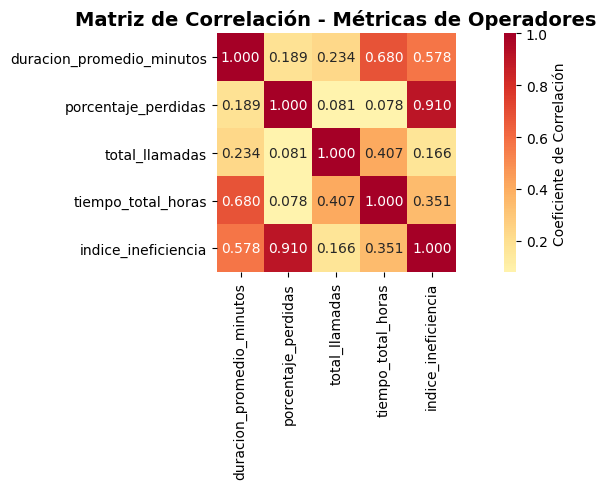

In [ ]:
# Crear heatmap de correlaciones
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='RdYlBu_r',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'label': 'Coeficiente de Correlación'})

plt.title('Matriz de Correlación - Métricas de Operadores',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Correlación específica en operadores críticos
operadores_criticos_corr = operadores_criticos[['duracion_promedio_minutos',
                                               'porcentaje_perdidas',
                                               'total_llamadas']].corr()

print("CORRELACIÓN EN OPERADORES CRÍTICOS:")
print(operadores_criticos_corr.round(3))

CORRELACIÓN EN OPERADORES CRÍTICOS:
                           duracion_promedio_minutos  porcentaje_perdidas  \
duracion_promedio_minutos                      1.000               -0.892   
porcentaje_perdidas                           -0.892                1.000   
total_llamadas                                 0.898               -0.707   

                           total_llamadas  
duracion_promedio_minutos           0.898  
porcentaje_perdidas                -0.707  
total_llamadas                      1.000  


### Conclusiones:

**Correlación General vs. Operadores Críticos:** <br>
En población general:
- Tiempo ↔ Llamadas perdidas: +0.189 (correlación débil positiva)

En operadores críticos:
- Tiempo ↔ Llamadas perdidas: -0.892 (correlación fuerte NEGATIVA)

# Conclusiones y Recomendaciones

## Resumen Ejecutivo

El análisis de eficiencia operativa de CallMeMaybe reveló problemas críticos de rendimiento que afectan significativamente la operación del call center. **Mediante pruebas estadísticas confirmamos que 273 operadores (21%) requieren intervención diferenciada según dos perfiles críticos identificados.

## Hallazgos criticos

**Riesgo Operativo Alto:**
- 21% de operadores (69 de total) presentan riesgo operativo crítico
- 1 de cada 5 operadores requiere intervención inmediata

**Oportunidades de Optimización:**
- Tiempo promedio por llamada: 10.79 minutos (optimizable)
- Mediana de productividad: 19 llamadas por agente
- Casos extremos con tiempos de hasta 257 minutos

**Validación Estadística:**
- **Hipótesis 1 CONFIRMADA:** Operadores críticos superan significativamente el estándar de 8 min (promedio: 27.09 min, p<0.001)
- **Hipótesis 2 CONFIRMADA:** Operadores críticos superan el umbral del 25% de llamadas perdidas (promedio: 59.45%, p<0.001)

**Descubrimiento Clave - Dos Perfiles Críticos:**
- **Correlación general:** Tiempo ↔ Llamadas perdidas: +0.189 (débil positiva)
- **Correlación en críticos:** Tiempo ↔ Llamadas perdidas: -0.892 (fuerte NEGATIVA)

**Perfiles Identificados:**
- **Tipo A:** Operadores perfeccionistas/lentos (más tiempo = menos pérdidas)
- **Tipo B:** Operadores impacientes/sobrecargados (menos tiempo = más pérdidas)

## Impacto en el Negocio

Sin acciones correctivas inmediatas, CallMeMaybe enfrenta riesgos significativos de deterioro en la reputación del servicio al cliente y potencial pérdida de clientes debido a tiempos de espera prolongados y llamadas perdidas.

## Recomendaciones Prioritarias

**Intervención Diferenciada por Perfil:**

**Para Operadores Tipo A (Perfeccionistas/Lentos):**
- Capacitación en técnicas de eficiencia temporal
- Establecimiento de límites de tiempo por llamada
- Herramientas de gestión de tiempo

**Para Operadores Tipo B (Impacientes/Sobrecargados):**
- Capacitación en manejo de estrés y paciencia
- Revisión de carga de trabajo
- Técnicas de retención de llamadas

**Acciones Inmediatas:**
- Segmentación de los 273 operadores críticos según correlación tiempo-pérdidas
- Programas de capacitación específicos por perfil
- Monitoreo diferenciado de KPIs según tipo de operador